**МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ**

**ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ**

**МУРМАНСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ**

**Институт арктических технологий**

**Кафедра цифровых технологий, математики и экономики**

**Дисциплина:** Обработка экспериментальных данных

**Расчётно-графическая работа**

**Тема**: Реализация генерации функций распределения случайный величин

**Проверил**: доцент кафедры ЦТМиЭ, к. ф.-м. н., Золотов Олег Владимирович

**Выполнил**: студент группы ИВТб18о-1, Трохачев Дмитрий Романович

**Дата защиты**: 

**Задание**:

1. Сгенерировать выборки со следующим количеством элементов (10, 100, 1000, 10000, 100000, 1000000) для следующих распределений:
    1) Биномиальное распределение
    2) Распределение Бернулли
    3) Геометрическое распределение
    4) Распределение Пуассона
    5) Экспоненциальное распределение
    6) Равномерное распределение
    7) Нормальное распределение
    8) Распределение хи-квадрат
    9) Распределение Стьюдента
    10) Распределение Фишера
    11) Распределение Вейбулла
2. Для выборок посчитать оценки: математическое ожидание, дисперсия, среднеквадратическое отклонение, медиана
3. Сделать анимации гистограмм распределений и зависимости числа элементов в выборке от математического ожидания



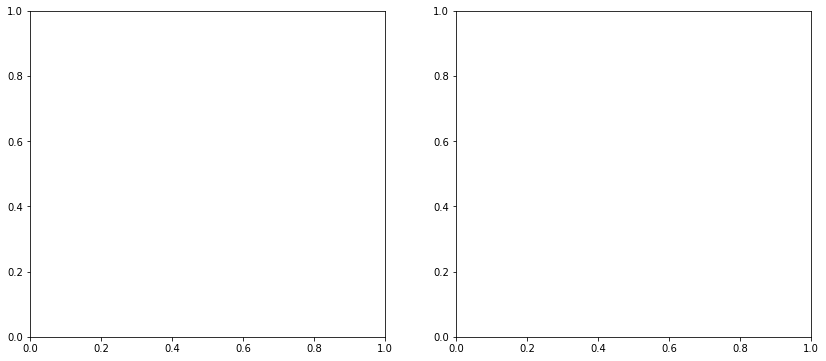

In [1]:
import scipy.stats as sps
import scipy.ndimage as snd
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(14,6))
ax = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

sizes = [10, 100, 1000, 10000, 100000, 1000000]


## 1) Биномиальное распределение 
 
Биномиальное распределение используется, когда необходимо определить сколько раз происходит некоторое событие в серии из определенного числа независимых опытов, выполняемых в одинаковых условиях.
 
$f(x;n,p)=C_n^k p^x q^{(n-x)}$
 
$F(x;n,p)=\sum_{i=0}^x C_n^i p^i q^{(n-i)}$
 
$n \geq 0$ - число независимых испытаний
 
$0 \leq p \leq 1$ - вероятность появления некоторого события в каждом испытании
 
$q = 1 - p$ - вероятность не появления некоторого события в каждом испытании
 
$M(X) = np$
 
$D(X) = npq$
 
$\sigma(X) = \sqrt{npq}$


In [2]:
def generateBinomialRandomVariables(n, p, s):
    binom_rvs = sps.binom.rvs(n=n, p=p, size=s)
    return binom_rvs

In [3]:
x_sizes = [0, 10, 100, 1000, 10000, 100000, 1000000]
def animate(curr): 
    n, p = 10, 0.5
    rvs = generateBinomialRandomVariables(n, p, sizes[curr])
  
    means.append(rvs.mean())
    ax.clear()

    ax.set_title("Биномиальное распределение:" +
        "\nМат. ожидание: " + str(rvs.mean()) +
        "\nСКО: " + str(rvs.std()) +
        "\nМедиана: " + str(np.median(rvs)), fontsize = 10)
    ax.hist(rvs, density=True, bins=10)
    
    min_ = min(means)
    max_ = max(means)

    ax2.clear()
    ax2.set_ylim(min_ - 0.1, max_ + 0.1)
    ax2.set_xlim(0, len(sizes))
    ax2.plot(means, lw=3)
    ax2.hlines(y=sps.binom(n, p).mean(), xmin=0, xmax=sizes[curr], lw=1, colors='red')
    ax2.set_xticklabels(list(map(str, x_sizes)))

In [4]:
from matplotlib import rc
from matplotlib import animation
means = []
anim = animation.FuncAnimation(fig, animate, frames=6, interval=1000)
rc('animation', html='jshtml')
anim

C:\Users\balle\AppData\Local\Temp\ipykernel_5172\2414842670.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(map(str, x_sizes)))


## 2) Распределение Бернулли

Распределение Бернулли является частным случаем биномиального распределения, где проводится одно испытание (поэтому n будет равно 1 для такого биномиального распределения).

Распределение применяется для моделирования случайного эксперимента произвольной природы, когда заранее известна вероятность успеха или неудачи.

$$f(x) = \left\{
\begin{matrix}
1 - p, & x = 0 \\
p, & x = 1
\end{matrix}
\right..$$

Принято говорить, что событие $ \{X=1\}$ соответствует «успеху», а событие $ \{X=0\}$ — «неудаче». Эти названия условные, и в зависимости от конкретной задачи могут быть заменены на противоположные.

$0 \leq p \leq 1$ - вероятность появления события в испытании

$ M(X) = p $;

$D(X) = p \cdot (1 - p) = p \cdot q $;

$\sigma(X) = \sqrt{p \cdot q}$.


In [5]:
def generateBernoulliRandomVariables(p, s):
    bernoulli_rvs = sps.bernoulli.rvs(p, size=s)
    mean = bernoulli_rvs.mean()
    return bernoulli_rvs

In [6]:
x_sizes = [0, 10, 100, 1000, 10000, 100000, 1000000]
def animate(curr): 
    p = 0.5
    rvs = generateBernoulliRandomVariables(p, sizes[curr])
  
    means.append(rvs.mean())
    ax.clear()

    ax.set_title("Распределение Бернулли:" +
        "\nМат. ожидание: " + str(rvs.mean()) +
        "\nСКО: " + str(rvs.std()) +
        "\nМедиана: " + str(np.median(rvs)), fontsize = 10)
    ax.hist(rvs, density=True, bins=10)
    
    min_ = min(means)
    max_ = max(means)

    ax2.clear()
    ax2.set_ylim(min_ - 0.1, max_ + 0.1)
    ax2.set_xlim(0, len(sizes))
    ax2.plot(means, lw=3)
    ax2.hlines(y=sps.bernoulli(p).mean(), xmin=0, xmax=sizes[curr], lw=1, colors='red')
    ax2.set_xticklabels(list(map(str, x_sizes)))

In [7]:
from matplotlib import rc
from matplotlib import animation
means = []
anim = animation.FuncAnimation(fig, animate, frames=6, interval=1000)
rc('animation', html='jshtml')
anim

C:\Users\balle\AppData\Local\Temp\ipykernel_5172\3855798749.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(map(str, x_sizes)))


In [8]:
def generateGeomRandomVariables(p, s):
    geom_rvs = sps.geom.rvs(p, size=s) 
    return geom_rvs

In [9]:
x_sizes = [0, 10, 100, 1000, 10000, 100000, 1000000]
def animate(curr): 
    p = 0.5
    rvs = generateGeomRandomVariables(p, sizes[curr])
  
    means.append(rvs.mean())
    ax.clear()
    
    ax.set_title("Геометрическое распределение:" +
        "\nМат. ожидание: " + str(rvs.mean()) +
        "\nСКО: " + str(rvs.std()) +
        "\nМедиана: " + str(np.median(rvs)), fontsize = 10)
    ax.hist(rvs, density=True, bins=10)
    
    min_ = min(means)
    max_ = max(means)

    ax2.clear()
    ax2.set_ylim(min_ - 0.1, max_ + 0.1)
    ax2.set_xlim(0, len(sizes))
    ax2.plot(means, lw=3)
    ax2.hlines(y=sps.geom(p).mean(), xmin=0, xmax=sizes[curr], lw=1, colors='red')
    ax2.set_xticklabels(list(map(str, x_sizes)))

In [10]:
from matplotlib import rc
from matplotlib import animation
means = []
anim = animation.FuncAnimation(fig, animate, frames=6, interval=1000)
rc('animation', html='jshtml')
anim

C:\Users\balle\AppData\Local\Temp\ipykernel_5172\4074910716.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(map(str, x_sizes)))


## 4) Распределение Пуассона
— распределение дискретного типа случайной величины, представляющей собой число событий, произошедших за фиксированное время, при условии, что данные события происходят с некоторой фиксированной средней интенсивностью и независимо друг от друга.

Примеры ситуаций, которые можно смоделировать, применив это распределение: поломки оборудования, длительность исполнения ремонтных работ стабильно работающим сотрудником, ошибка печати, рост колонии бактерий в чашке Петри, дефекты в длинной ленте или цепи, импульсы счётчика радиоактивного излучения, количество забиваемых футбольной командой голов и др.

$f(x) = {\frac {exp(-\mu) \cdot \mu ^{x}}{x!}}, x \ge 0$

$ \mu $ - среднее количество событий за фиксированный промежуток времени

$ M(X) = \mu $;

$D(X) = \mu $;

$\sigma(X) = \sqrt{ \mu }$.


In [11]:
def generatePoissonRandomVariables(mu, s):
    poisson_rvs = sps.poisson.rvs(mu, size=s)
    return poisson_rvs

In [12]:
x_sizes = [0, 10, 100, 1000, 10000, 100000, 1000000]
def animate(curr): 
    mu = 0.5
    rvs = generatePoissonRandomVariables(mu, sizes[curr])
  
    means.append(rvs.mean())
    ax.clear()
    
    ax.set_title("Распределение Пуассона:" +
        "\nМат. ожидание: " + str(rvs.mean()) +
        "\nСКО: " + str(rvs.std()) +
        "\nМедиана: " + str(np.median(rvs)), fontsize = 10)
    ax.hist(rvs, density=True, bins=10)
    
    min_ = min(means)
    max_ = max(means)

    ax2.clear()
    ax2.set_ylim(min_ - 0.1, max_ + 0.1)
    ax2.set_xlim(0, len(sizes))
    ax2.plot(means, lw=3)
    ax2.hlines(y=sps.poisson(mu).mean(), xmin=0, xmax=sizes[curr], lw=1, colors='red')
    ax2.set_xticklabels(list(map(str, x_sizes)))

In [13]:
from matplotlib import rc
from matplotlib import animation
means = []
anim = animation.FuncAnimation(fig, animate, frames=6, interval=1000)
rc('animation', html='jshtml')
anim

C:\Users\balle\AppData\Local\Temp\ipykernel_5172\3979600051.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(map(str, x_sizes)))


## 5) Экспоненциальное распределение

Экспоненциальное распределение предсказывает периоды времени между событиями (такими как успех, отказ, доставка и т.д.). Это непрерывное распределение, моделирующее время между двумя последовательными свершениями одного и того же события.
Параметры: $\lambda > 0$,  - среднее число событий за фиксированный промежуток времени = интенсивность (мат. ожидание).

$$f_{X}(x)={\begin{cases}\lambda \,e^{{-\lambda x}},&x\geq 0,\\0,&x<0.\end{cases}}$$

$$F_{X}(x)=\left\{{\begin{matrix}1-e^{{-\lambda x}}&,\;x\geq 0,\\0&,\;x<0.\end{matrix}}\right.$$

$$M(X) = {\lambda ^{-1}}$$

$$D(X) = {\lambda ^{-2}}$$

$$\sigma(X) = \sqrt{\lambda ^{-2}}$$




Экспоненциальное распределение применяется при моделировании времени ожидания, моделировании отказа, моделировании времени обслуживания.
Если число событий в единицу времени соответствует распределению Пуассона, тогда период времени между событиями соответствует экспоненциальному распределению.


In [14]:
def generateExponentialRandomVariables(s):
    expon_rvs = sps.expon.rvs(size=s)
    return expon_rvs

In [15]:
x_sizes = [0, 10, 100, 1000, 10000, 100000, 1000000]
def animate(curr): 
    rvs = generateExponentialRandomVariables(sizes[curr])
  
    means.append(rvs.mean())
    ax.clear()
    
    ax.set_title("Экспоненциальное распределение:" +
        "\nМат. ожидание: " + str(rvs.mean()) +
        "\nСКО: " + str(rvs.std()) +
        "\nМедиана: " + str(np.median(rvs)), fontsize = 10)
    ax.hist(rvs, density=True, bins=10)
    
    min_ = min(means)
    max_ = max(means)

    ax2.clear()
    ax2.set_ylim(min_ - 0.1, max_ + 0.1)
    ax2.set_xlim(0, len(sizes))
    ax2.plot(means, lw=3)
    ax2.hlines(y=sps.expon().mean(), xmin=0, xmax=sizes[curr], lw=1, colors='red')
    ax2.set_xticklabels(list(map(str, x_sizes)))

In [16]:
from matplotlib import rc
from matplotlib import animation
means = []
anim = animation.FuncAnimation(fig, animate, frames=6, interval=1000)
rc('animation', html='jshtml')
anim

C:\Users\balle\AppData\Local\Temp\ipykernel_5172\3565250337.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(map(str, x_sizes)))


## 6) Равномерное распределение

— распределение случайной вещественной величины, принимающей значения, принадлежащие некоторому промежутку конечной длины, характеризующееся тем, что плотность вероятности на этом промежутке почти всюду постоянна.

В современной вычислительной технике при моделировании случайных процессов часто приходится пользоваться с.в. X, имеющей равномерное распределение в пределах от 0 до 1.

$$f(x) = \left\{
\begin{matrix}
\frac{1}{b-a}, & x \in [a, b] \\
0, & x \not \in [a, b]
\end{matrix}
\right..$$


Если ${a=0}$ и ${b=1}$, то такое равномерное распределение называют стандартным.

$ M(X) = \frac{a+b}{2} $;

$D(X) = \frac{(b-a)^2}{12} $;

$\sigma(X) = \frac{b-a}{\sqrt{12}}$.



In [17]:
def generateUniformRandomVariables(s):
    uniform_rvs = sps.uniform.rvs(size=s)
    return uniform_rvs

In [18]:
x_sizes = [0, 10, 100, 1000, 10000, 100000, 1000000]
def animate(curr): 
    rvs = generateUniformRandomVariables(sizes[curr])
  
    means.append(rvs.mean())
    ax.clear()

    ax.set_title("Равномерное распределение:" +
        "\nМат. ожидание: " + str(rvs.mean()) +
        "\nСКО: " + str(rvs.std()) +
        "\nМедиана: " + str(np.median(rvs)), fontsize = 10)
    ax.hist(rvs, density=True, bins=10)
    
    min_ = min(means)
    max_ = max(means)

    ax2.clear()
    ax2.set_ylim(min_ - 0.1, max_ + 0.1)
    ax2.set_xlim(0, len(sizes))
    ax2.plot(means, lw=3)
    ax2.hlines(y=sps.uniform.mean(), xmin=0, xmax=sizes[curr], lw=1, colors='red')
    ax2.set_xticklabels(list(map(str, x_sizes)))

In [19]:
from matplotlib import rc
from matplotlib import animation
means = []
anim = animation.FuncAnimation(fig, animate, frames=6, interval=1000)
rc('animation', html='jshtml')
anim

C:\Users\balle\AppData\Local\Temp\ipykernel_5172\331614746.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(map(str, x_sizes)))


## 7) Нормальное распределение

Нормальное распределение часто встречается в природе. Например, следующие случайные величины хорошо моделируются нормальным распределением:

1. отклонение при стрельбе;
2. погрешности измерений (однако погрешности некоторых измерительных приборов имеют иное распределение);
3. некоторые характеристики живых организмов в популяции.

Стандартным нормальным распределением называется нормальное распределение с математическим ожиданием ${\mu =0}$ и стандартным отклонением ${ \sigma =1.}$



$${ f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$$

где параметр ${\mu }$  — математическое ожидание (среднее значение), медиана и мода распределения, а параметр ${\sigma }$ — среднеквадратическое отклонение, ${ \sigma ^{2}}$ — дисперсия распределения.

Функция распределения:
$${ \Phi (x)={\frac {1}{\sqrt {2\pi }}}\int \limits _{-\infty }^{x}e^{-t^{2}/2}\,dt.}$$

$$M(X) = \mu$$

$$D(X) =  {\sigma ^{2}} $$

$$\sigma(X) = \sigma $$





In [20]:
def generateNormalRandomVariables(s):
    norm_rvs = sps.norm.rvs(size=s)
    return norm_rvs

In [21]:
x_sizes = [0, 10, 100, 1000, 10000, 100000, 1000000]
def animate(curr): 
    rvs = generateNormalRandomVariables(sizes[curr])
  
    means.append(rvs.mean())
    ax.clear()

    ax.set_title("Нормальное распределение:" +
        "\nМат. ожидание: " + str(rvs.mean()) +
        "\nСКО: " + str(rvs.std()) +
        "\nМедиана: " + str(np.median(rvs)), fontsize = 10)
    
    ax.hist(rvs, density=True, bins=10)
    
    min_ = min(means)
    max_ = max(means)

    ax2.clear()
    ax2.set_ylim(min_ - 0.1, max_ + 0.1)
    ax2.set_xlim(0, len(sizes))
    ax2.plot(means, lw=3)
    ax2.hlines(y=sps.norm.mean(), xmin=0, xmax=sizes[curr], lw=1, colors='red')
    ax2.set_xticklabels(list(map(str, x_sizes)))

In [22]:
from matplotlib import rc
from matplotlib import animation
means = []
anim = animation.FuncAnimation(fig, animate, frames=6, interval=1000)
rc('animation', html='jshtml')
anim

C:\Users\balle\AppData\Local\Temp\ipykernel_5172\509743952.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(map(str, x_sizes)))


## 8) Распределение Хи-квадрат

— распределение суммы квадратов ${k}$ независимых стандартных нормальных случайных величин.

Распределение имеет многочисленные приложения при статистических выводах, например:
1) при использовании критерия хи-квадрат и при оценке дисперсий;
2) в проблеме оценивания среднего нормально распределённой популяции и проблеме оценивания наклона линии регрессии;
3) в дисперсионном анализе.

$f(x, k) = {\frac {(1/2)^{k/2}}{\Gamma (k/2)}}x^{k/2-1}e^{-x/2}$


$ M(X) = k $;

$D(X) = 2 \cdot k $;

$\sigma(X) = \sqrt{2 \cdot k}$.


In [23]:
def generateHiSquareRandomVariables(df, s):
    chi2_rvs = sps.chi2.rvs(df, size=s)
    return chi2_rvs

In [24]:
x_sizes = [0, 10, 100, 1000, 10000, 100000, 1000000]
def animate(curr): 
    df = 55
    rvs = generateHiSquareRandomVariables(df, sizes[curr])
  
    means.append(rvs.mean())
    ax.clear()
    ax.set_title("Распределение Хи-квадрат:" +
        "\nМат. ожидание: " + str(rvs.mean()) +
        "\nСКО: " + str(rvs.std()) +
        "\nМедиана: " + str(np.median(rvs)), fontsize = 10)
    ax.hist(rvs, density=True, bins=10)
    
    min_ = min(means)
    max_ = max(means)

    ax2.clear()
    ax2.set_ylim(min_ - 0.1, max_ + 0.1)
    ax2.set_xlim(0, len(sizes))
    ax2.plot(means, lw=3)
    ax2.hlines(y=sps.chi2(df).mean(), xmin=0, xmax=sizes[curr], lw=1, colors='red')
    ax2.set_xticklabels(list(map(str, x_sizes)))

In [25]:
from matplotlib import rc
from matplotlib import animation
means = []
anim = animation.FuncAnimation(fig, animate, frames=6, interval=1000)
rc('animation', html='jshtml')
anim

C:\Users\balle\AppData\Local\Temp\ipykernel_5172\2836714979.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(map(str, x_sizes)))


## 9) Распределение Стьюдента

Распределение Стьюдента играет важную роль в статистическом анализе и используется, например, в t-критерии Стьюдента для оценки статистической значимости разности двух выборочных средних, при построении доверительного интервала для математического ожидания нормальной совокупности при неизвестной дисперсии, а также в линейном регрессионном анализе

$${\ f_{t}(y)={\frac {\Gamma \left({\frac {n+1}{2}}\right)}{{\sqrt {n\pi }}\,\Gamma \left({\frac {n}{2}}\right)}}\,\left(1+{\frac {y^{2}}{n}}\right)^{-{\frac {n+1}{2}}}}$$

где $${ \Gamma (z)=\int \limits _{0}^{+\infty }t^{z-1}e^{-t}\,dt,\quad z\in \mathbb {C} ,\quad \mathrm {Re} (z)>0}$$ - гамма-функция

$$M(X) = 0, n > 1$$

$$D(X) = 0$$

$$\sigma(X) = {\frac  {n}{n-2}}, n > 2$$

In [26]:
def generateStudentRandomVariables(df, s):
    student_rvs = sps.t.rvs(df, size=s)
    return student_rvs

In [27]:
x_sizes = [0, 10, 100, 1000, 10000, 100000, 1000000]
def animate(curr): 
    df = 2.74
    rvs = generateStudentRandomVariables(df, sizes[curr])
  
    means.append(rvs.mean())
    ax.clear()
    ax.set_ylabel('Частота появления X')
    ax.set_xlabel('Значение X')
    ax.set_title("Распределение Cтьюдента:" +
        "\nМат. ожидание: " + str(rvs.mean()) +
        "\nСКО: " + str(rvs.std()) +
        "\nМедиана: " + str(np.median(rvs)), fontsize = 10)
    ax.hist(rvs, density=True, bins=10)
    
    min_ = min(means)
    max_ = max(means)

    ax2.clear()
    ax2.set_ylim(min_ - 0.1, max_ + 0.1)
    ax2.set_xlim(0, len(sizes))
    ax2.plot(means, lw=3)
    ax2.hlines(y=sps.t(df).mean(), xmin=0, xmax=sizes[curr], lw=1, colors='red')
    ax2.set_xticklabels(list(map(str, x_sizes)))

In [28]:
from matplotlib import rc
from matplotlib import animation
means = []
anim = animation.FuncAnimation(fig, animate, frames=6, interval=1000)
rc('animation', html='jshtml')
anim

C:\Users\balle\AppData\Local\Temp\ipykernel_5172\2031255288.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(map(str, x_sizes)))


## 10) Распределение Фишера

Вид - непрерывное
 
На распределении Фишера основан ряд статистических тестов, таких как оценка значимости параметров регрессии, тест на гетероскедастичность и тест на равенство дисперсий нормальных выборок
 
Распределение Фишера определено для действительных неотрицательных аргументов
 
Пусть $Y_{1},Y_{2}$ — две независимые случайные величины, имеющие распределение хи-квадрат: ${\displaystyle Y_{i}\sim \chi ^{2}(d_{i})}$, где $\in {\mathbb  {N}},\;i=1,2$. Тогда распределение случайной величины
 
$F={\frac  {Y_{1}/d_{1}}{Y_{2}/d_{2}}}$ называется распределением Фишера со степенями свободы $d_{1} и d_{2}.$
 
$f(x)={ {\frac {\sqrt {\frac {(d_{1}\,x)^{d_{1}}\,\,d_{2}^{d_{2}}}{(d_{1}\,x+d_{2})^{d_{1}+d_{2}}}}}{x\,\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}}$

${\ \mathrm {B} (x,y)=\int \limits _{0}^{1}t^{x-1}(1-t)^{y-1}\,dt,}$
 
$d_{1}>0,\ d_{2}>0$ - числа степеней свободы
 
$F(x)={ I_{\frac {d_{1}x}{d_{1}x+d_{2}}}(d_{1}/2,d_{2}/2)}$
 
$M(x)={ {\frac {d_{2}}{d_{2}-2}}}$, если $d_2>2$
 
$D(x)={ {\frac {2\,d_{2}^{2}\,(d_{1}+d_{2}-2)}{d_{1}(d_{2}-2)^{2}(d_{2}-4)}},}$ если $d_2>4$




In [29]:
def generateFisherRandomVariables(d1, d2, s):
    fisher_rvs = sps.f.rvs(d1, d2, size=s)
    return fisher_rvs


In [30]:
x_sizes = [0, 10, 100, 1000, 10000, 100000, 1000000]
def animate(curr): 
    d1, d2 = 3, 3
    rvs = generateFisherRandomVariables(d1, d2, sizes[curr])
  
    means.append(rvs.mean())
    ax.clear()
    ax.set_title("Распределение Фишера:" +
            "\nМат. ожидание: " + str(rvs.mean()) +
            "\nСКО: " + str(rvs.std()) +
            "\nМедиана: " + str(np.median(rvs)), fontsize = 10)
    ax.hist(rvs, density=True, bins=10)
    
    min_ = min(means)
    max_ = max(means)

    ax2.clear()
    ax2.set_ylim(min_ - 0.1, max_ + 0.1)
    ax2.set_xlim(0, len(sizes))
    ax2.plot(means, lw=3)
    ax2.hlines(y=sps.f(d1, d2).mean(), xmin=0, xmax=sizes[curr], lw=1, colors='red')
    ax2.set_xticklabels(list(map(str, x_sizes)))

In [31]:
from matplotlib import rc
from matplotlib import animation
means = []
anim = animation.FuncAnimation(fig, animate, frames=6, interval=1000)
rc('animation', html='jshtml')
anim

C:\Users\balle\AppData\Local\Temp\ipykernel_5172\556734130.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(map(str, x_sizes)))


## 11) Распределение Вейбулла

Примеры использования распределения Вейбулла:
1. В анализе выживаемости
2. В надёжности и анализе отказов
3. В электротехнике для представления перенапряжения, возникающего в электрических цепях
4. В промышленной инженерии
5. В теории экстремальных значений
6. В прогнозировании погоды (Для описания распределения скорости ветра как распределения, обычно совпадающего с распределением Вейбулла в ветроэнергетике)

 
$$f_X(x) = \left\{
\begin{matrix}
\frac{k}{\lambda} \left(\frac{x}{\lambda}\right)^{k-1} e^{-\left(\frac{x}{\lambda}\right)^k}, & x \ge 0 \\
0, & x < 0
\end{matrix}
\right..$$
 
$F(x;k,\lambda)=1- e^{-(x/\lambda)^k}$
 
$\lambda > 0$ - коэффициент масштаба

$k > 0$ - коэффициент формы
  
$M(X) = {\lambda \Gamma \left(1+{\frac {1}{k}}\right)}$
 
$D(X) = {\lambda ^{2}\Gamma \left(1+{\frac {2}{k}}\right)-\mu ^{2}}$
 
$\sigma(X) = \sqrt{\lambda ^{2}\Gamma \left(1+{\frac {2}{k}}\right)-\mu ^{2}}$


где $${ \Gamma (z)=\int \limits _{0}^{+\infty }t^{z-1}e^{-t}\,dt,\quad z\in \mathbb {C} ,\quad \mathrm {Re} (z)>0}$$ - гамма-функция

In [32]:
def generateWeibullRandomVariables(c, s):
    weibull_rvs = sps.weibull_min.rvs(c, size=s)
    return weibull_rvs

In [33]:
x_sizes = [0, 10, 100, 1000, 10000, 100000, 1000000]
def animate(curr): 
    c = 1.79
    rvs = generateWeibullRandomVariables(c, sizes[curr])
  
    means.append(rvs.mean())
    ax.clear()
    ax.set_title("Распределение Вейбулла: " +
              "\nМат. ожидание: " + str(rvs.mean()) +
              "\nСКО: " + str(rvs.std()) +
              "\nМедиана: " + str(np.median(rvs)), fontsize = 10)
    ax.hist(rvs, density=True, bins=10)
    
    min_ = min(means)
    max_ = max(means)

    ax2.clear()
    ax2.set_ylim(min_ - 0.1, max_ + 0.1)
    ax2.set_xlim(0, len(sizes))
    ax2.plot(means, lw=3)
    ax2.hlines(y=sps.weibull_min(c).mean(), xmin=0, xmax=sizes[curr], lw=1, colors='red')
    ax2.set_xticklabels(list(map(str, x_sizes)))

In [34]:
from matplotlib import rc
from matplotlib import animation
means = []
anim = animation.FuncAnimation(fig, animate, frames=6, interval=1000)
rc('animation', html='jshtml')
anim

C:\Users\balle\AppData\Local\Temp\ipykernel_5172\4078328752.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(map(str, x_sizes)))


Матрица ковариации
 [[1.00539151 1.00494074]
 [1.00494074 1.02839512]]
Матрица корреляции по Пирсону
 [[1.         0.98830921]
 [0.98830921 1.        ]]
Корреляция по Спирмену
 SpearmanrResult(correlation=0.9870938519643094, pvalue=0.0)


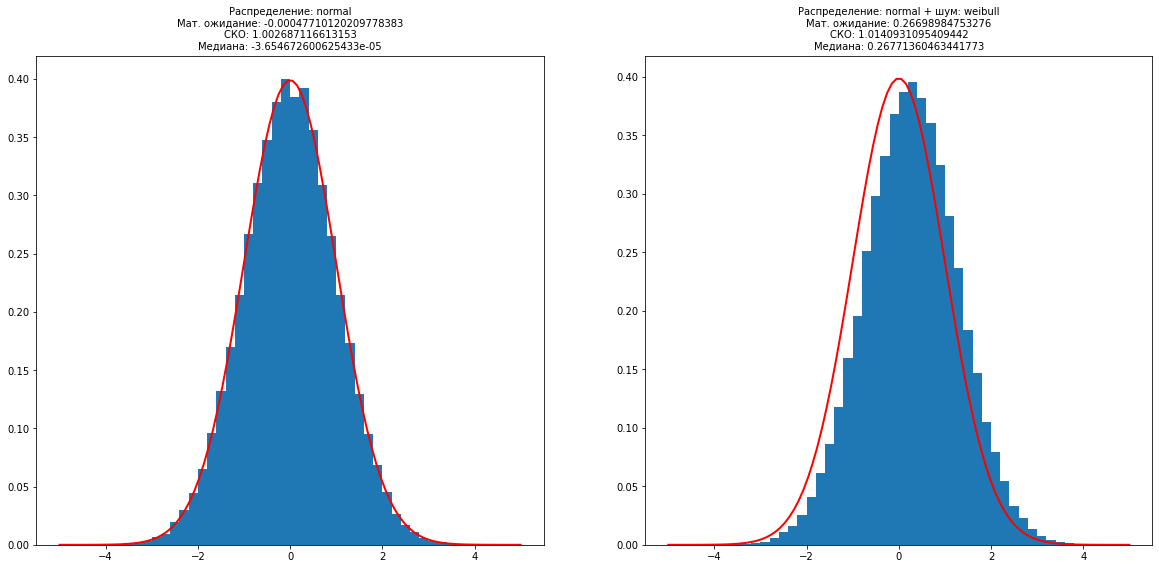

In [35]:
distr = "normal"
noise = "weibull"
multiplier = 0.3

default_rvs = sps.norm.rvs(size=100000)
noise_rvs = sps.weibull_min.rvs(c = 1.79, size=100000)
withNoise = default_rvs + noise_rvs * multiplier

covariate = np.cov(default_rvs, withNoise)
corrPierson = np.corrcoef(default_rvs, withNoise)
corrSpierman = sps.spearmanr(default_rvs, withNoise)

print("Матрица ковариации\n", covariate)
print("Матрица корреляции по Пирсону\n", corrPierson)
print("Корреляция по Спирмену\n", corrSpierman)

fig = plt.figure(figsize=(20, 9))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

bins = 50
xLim = (-5, 5)
xTicks = np.linspace(xLim[0], xLim[1], 100)
probFun = sps.norm.pdf(xTicks)

ax1.hist(default_rvs, bins=bins, density=True, range=xLim)
ax2.hist(withNoise, bins=bins, density=True, range=xLim)

ax1.set_title("Распределение: " + distr +
              "\nМат. ожидание: " + str(default_rvs.mean()) +
              "\nСКО: " + str(default_rvs.std()) +
              "\nМедиана: " + str(np.median(default_rvs)), fontsize = 10)
ax1.plot(xTicks, probFun, 'r-', lw = 2)

ax2.set_title("Распределение: " + distr + " + шум: " + noise +
              "\nМат. ожидание: " + str(withNoise.mean()) +
              "\nСКО: " + str(withNoise.std()) +
              "\nМедиана: " + str(np.median(withNoise)), fontsize = 10)
ax2.plot(xTicks, probFun, 'r-', lw = 2)
plt.show()